In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yale-face-database/subject05.surprised
/kaggle/input/yale-face-database/subject09.normal
/kaggle/input/yale-face-database/subject04.rightlight
/kaggle/input/yale-face-database/subject03.leftlight
/kaggle/input/yale-face-database/subject07.glasses
/kaggle/input/yale-face-database/subject03.normal
/kaggle/input/yale-face-database/subject11.rightlight
/kaggle/input/yale-face-database/subject02.surprised
/kaggle/input/yale-face-database/subject14.surprised
/kaggle/input/yale-face-database/subject12.centerlight
/kaggle/input/yale-face-database/subject01.sad
/kaggle/input/yale-face-database/subject09.glasses
/kaggle/input/yale-face-database/subject01.rightlight
/kaggle/input/yale-face-database/subject03.noglasses
/kaggle/input/yale-face-database/subject06.noglasses
/kaggle/input/yale-face-database/subject09.happy
/kaggle/input/yale-face-database/subject03.centerlight
/kaggle/input/yale-face-database/subject12.surprised
/kaggle/input/yale-face-database/subject15.surprised
/kaggl

In [2]:
# Import basic library
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from os import listdir

In [3]:
DIRECTORY = "../input/yale-face-database/"

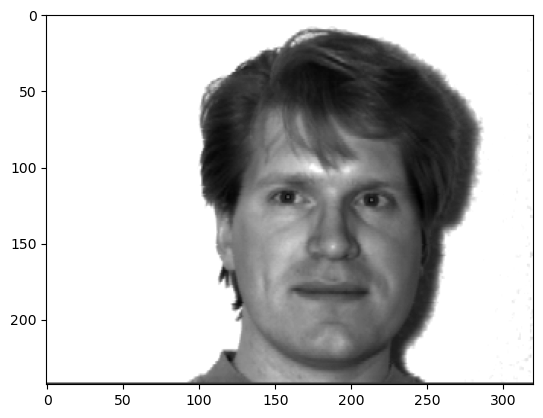

In [4]:
IMAGE = "subject01.centerlight"
filename = DIRECTORY + IMAGE
pixels = plt.imread(filename)
plt.imshow(pixels,cmap='gray')
plt.show()

In [5]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if 
               contains in f)

## Creating Data

In [6]:
filenames = pd.DataFrame(list_files(DIRECTORY, "subject"))

df = filenames[0].str.split(".", expand=True)
df["filename"] = filenames

df = df.rename(columns = {0:"subject", 1:"category"})
df['subject'] = df.subject.str.replace('subject', '')
df.apply(pd.to_numeric, errors='coerce').dropna()
df['subject'] = pd.to_numeric(df["subject"])
df

,subject,category,filename
0,5,surprised,subject05.surprised
1,9,normal,subject09.normal
2,4,rightlight,subject04.rightlight
3,3,leftlight,subject03.leftlight
4,7,glasses,subject07.glasses
...,...,...,...
160,10,noglasses,subject10.noglasses
161,6,centerlight,subject06.centerlight
162,14,centerlight,subject14.centerlight
163,12,normal,subject12.normal


### Displaying Example Images

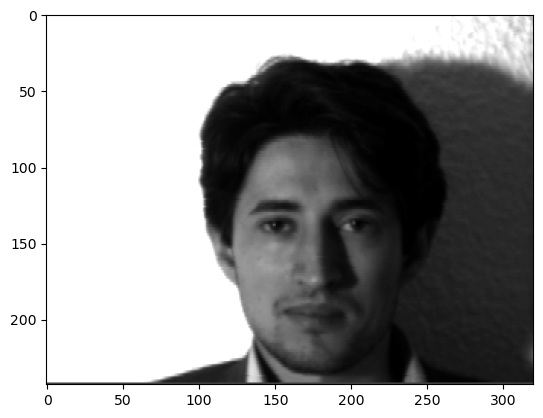

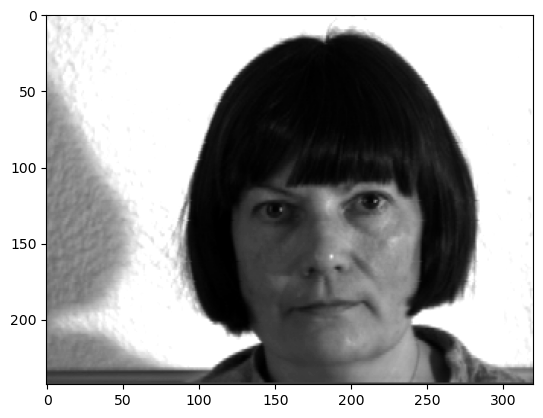

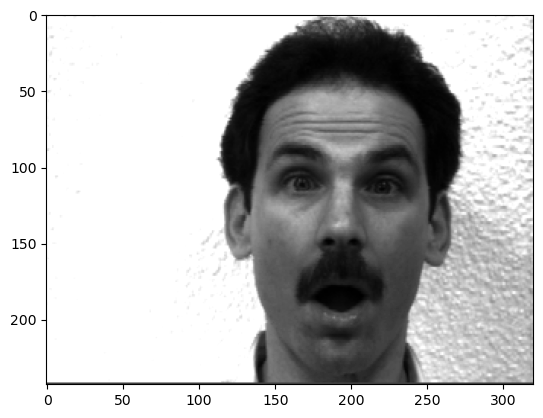

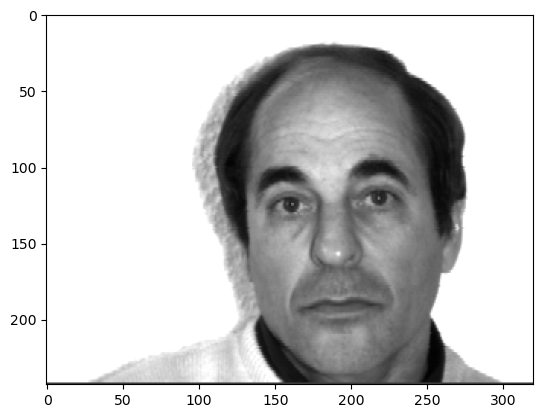

In [183]:
path1=DIRECTORY+df["filename"][3]
path2=DIRECTORY+df["filename"][6]
path3=DIRECTORY+df["filename"][7]
path4=DIRECTORY+df["filename"][9]

img1=plt.imread(path1)
img2=plt.imread(path2)
img3=plt.imread(path3)
img4=plt.imread(path4)

plt.imshow(img1,cmap='gray')
plt.show()
plt.imshow(img2,cmap='gray')
plt.show()
plt.imshow(img3,cmap='gray')
plt.show()
plt.imshow(img4,cmap='gray')
plt.show()

### Visualizing SIFT keypoints

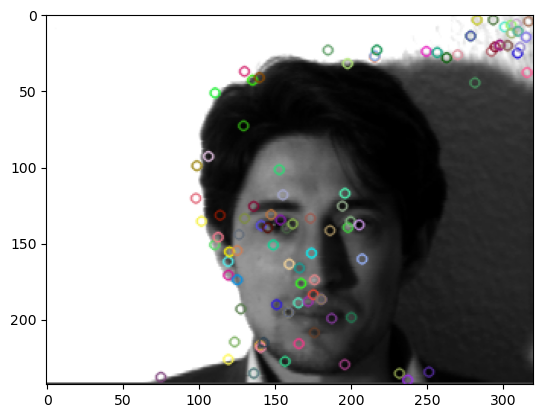

In [185]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
img = cv2.drawKeypoints(img1, kp1, img1)
plt.imshow(img,cmap='gray')

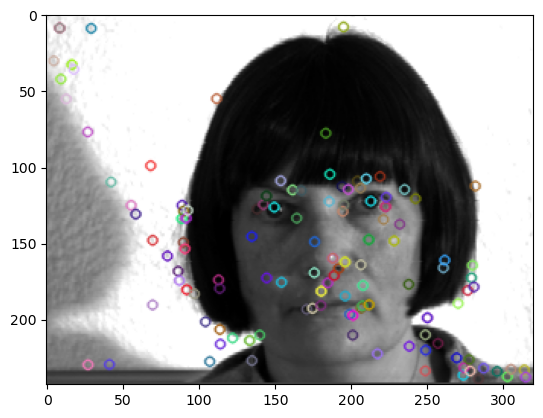

In [186]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img2,None)
img = cv2.drawKeypoints(img2, kp1, img1)
plt.imshow(img,cmap='gray')

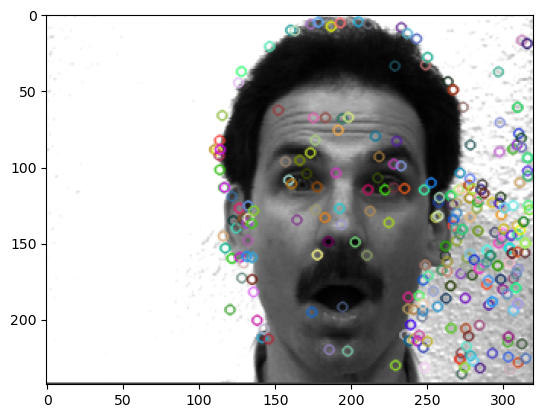

In [187]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img3,None)
img = cv2.drawKeypoints(img3, kp1, img1)
plt.imshow(img,cmap='gray')

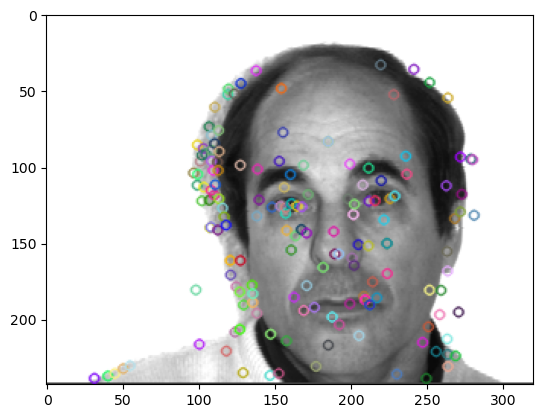

In [188]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img4,None)
img = cv2.drawKeypoints(img4, kp1, img1)
plt.imshow(img,cmap='gray')

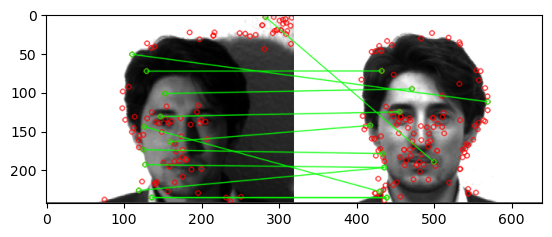

(<matplotlib.image.AxesImage at 0x7f9944e6ecd0>, None)

In [67]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary

# apply FLANN based matcher with knn
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
l=0
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        matchesMask[i]=[1,0]
        l+=1
draw_params = dict(matchColor = (0,255,0),singlePointColor = (255,0,0),matchesMask = matchesMask,flags = 0)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3),plt.show()


In [ ]:
img=

In [68]:
print(l)

12


### Using SIFT (threshold=0.8)


In [76]:
correct=0
for i in range(165):
   
    path=DIRECTORY+df["filename"][i]
    img=plt.imread(path)
    kp1, des1 = sift.detectAndCompute(img,None)
    curr=-1
    ans
    for j in range(165):
        if(j==i):
            continue
        path1=DIRECTORY+df["filename"][j]
        img1=plt.imread(path1)
        kp2,des2=sift.detectAndCompute(img1,None)
        matches = flann.knnMatch(des1,des2,k=2)
        l=0
        # ratio test as per Lowe's paper
        for k,(m,n) in enumerate(matches):
            if m.distance < 0.8*n.distance:
                l+=1
        if(curr<l):
            curr=l
            ans=j
    
    if(df["subject"][ans]==df["subject"][i]):
        correct+=1
    print(correct)          
            

1
2
2
3
4
5
6
7
8
9
10
11
11
12
13
14
15
16
17
18
19
20
20
21
22
23
23
23
24
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
41
42
43
44
45
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
61
62
63
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
94
95
96
97
98
99
100
100
101
102
103
104
105
105
106
106
107
108
109
110
111
112
112
113
114
115
116
116
117
118
119
120
121
121
122
123
124
124
125
126
127
128
129
130
130
131
132
133
134
135
136
137
138
139
140
141
141
141
142
143


In [77]:
print("accuracy: ",correct/165)

accuracy:  0.8666666666666667


### SIFT (threshold=0.9)

In [79]:
correct=0
for i in range(165):
   
    path=DIRECTORY+df["filename"][i]
    img=plt.imread(path)
    kp1, des1 = sift.detectAndCompute(img,None)
    curr=-1
    ans
    for j in range(165):
        if(j==i):
            continue
        path1=DIRECTORY+df["filename"][j]
        img1=plt.imread(path1)
        kp2,des2=sift.detectAndCompute(img1,None)
        matches = flann.knnMatch(des1,des2,k=2)
        l=0
        # ratio test as per Lowe's paper
        for k,(m,n) in enumerate(matches):
            if m.distance < 0.9*n.distance:
                l+=1
        if(curr<l):
            curr=l
            ans=j
    
    if(df["subject"][ans]==df["subject"][i]):
        correct+=1          

print("accuracy: ",correct/165)

accuracy:  0.793939393939394


#### Threshold=0.7

In [80]:
correct=0
sift = cv2.SIFT_create()

for i in range(165):
   
    path=DIRECTORY+df["filename"][i]
    img=plt.imread(path)
    kp1, des1 = sift.detectAndCompute(img,None)
    curr=-1
    ans
    for j in range(165):
        if(j==i):
            continue
        path1=DIRECTORY+df["filename"][j]
        img1=plt.imread(path1)
        kp2,des2=sift.detectAndCompute(img1,None)
        matches = flann.knnMatch(des1,des2,k=2)
        l=0
        # ratio test as per Lowe's paper
        for k,(m,n) in enumerate(matches):
            if m.distance < 0.7*n.distance:
                l+=1
        if(curr<l):
            curr=l
            ans=j
    
    if(df["subject"][ans]==df["subject"][i]):
        correct+=1          

print("accuracy: ",correct/165)

accuracy:  0.9030303030303031


In [83]:
#### Threshold=0.6
correct=0
sift = cv2.SIFT_create()

for i in range(165):
   
    path=DIRECTORY+df["filename"][i]
    img=plt.imread(path)
    kp1, des1 = sift.detectAndCompute(img,None)
    curr=-1
    ans
    for j in range(165):
        if(j==i):
            continue
        path1=DIRECTORY+df["filename"][j]
        img1=plt.imread(path1)
        kp2,des2=sift.detectAndCompute(img1,None)
        matches = flann.knnMatch(des1,des2,k=2)
        l=0
        # ratio test as per Lowe's paper
        for k,(m,n) in enumerate(matches):
            if m.distance < 0.6*n.distance:
                l+=1
        if(curr<l):
            curr=l
            ans=j
    
    if(df["subject"][ans]==df["subject"][i]):
        correct+=1  
    print(correct)
        
        
print("accuracy: ",correct/165)

1
2
2
3
4
5
6
7
8
9
10
11
11
12
13
14
15
16
17
18
19
20
21
22
23
24
24
24
25
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
50
51
52
53
54
55
56
57
58
59
60
61
62
62
62
63
64
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
95
96
97
98
99
100
101
101
102
103
104
105
106
107
108
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
125
126
127
128
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
146
147
148
149
accuracy:  0.9030303030303031


## t=0.5

In [86]:
correct=0
sift = cv2.SIFT_create()

for i in range(165):
   
    path=DIRECTORY+df["filename"][i]
    img=plt.imread(path)
    kp1, des1 = sift.detectAndCompute(img,None)
    curr=-1
    ans
    for j in range(165):
        if(j==i):
            continue
        path1=DIRECTORY+df["filename"][j]
        img1=plt.imread(path1)
        kp2,des2=sift.detectAndCompute(img1,None)
        matches = flann.knnMatch(des1,des2,k=2)
        l=0
        # ratio test as per Lowe's paper
        for k,(m,n) in enumerate(matches):
            if m.distance < 0.5*n.distance:
                l+=1
        if(curr<l):
            curr=l
            ans=j
    
    if(df["subject"][ans]==df["subject"][i]):
        correct+=1
    print(correct)

print("accuracy: ",correct/165)

1
2
2
3
4
5
5
6
7
8
9
10
10
11
12
13
14
15
16
17
18
19
20
21
22
23
23
23
24
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
45
45
46
47
47
48
49
50
51
52
53
54
55
56
57
58
59
59
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
93
94
95
96
97
98
99
99
100
101
102
103
104
105
106
106
107
108
109
110
111
112
112
113
114
115
116
117
118
119
120
121
122
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
144
145
146
147
accuracy:  0.8909090909090909


In [163]:
import numpy as np


def harris(img):
    
    dst = cv2.cornerHarris(img, 2, 3, 0.04)
    print(dst.shape)
    result_img = img.copy() # deep copy image
    # Threshold for an optimal value, it may vary depending on the image.
    # draws the Harris corner key-points on the image (RGB [0, 0, 255] -> blue)
    result_img[dst > 0.01 * dst.max()] = [255]
    # for each dst larger than threshold, make a keypoint out of it
    keypoints = np.argwhere(dst > 0.01 * dst.max())
    keypoints = [cv2.KeyPoint(float(x[1]), float(x[0]), 13) for x in keypoints]
    return (keypoints, result_img)

(243, 320)


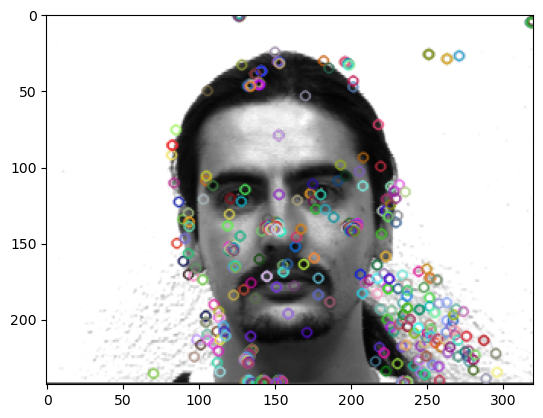

In [166]:
kp, img1 = harris(img1)

    # compute the SIFT descriptors from the Harris Corner keypoints 
    
a=sift.compute(img, kp)
img = cv2.drawKeypoints(img, kp, img)

plt.imshow(img)


In [179]:
print(a[0][1])

<KeyPoint 0x7f9964959540>


In [180]:
correct =0
sift = cv2.SIFT_create()
for i in range(165):
   
    path=DIRECTORY+df["filename"][i]
    img=plt.imread(path)
    kp1, des1 = sift.detectAndCompute(img,None)
    curr=-1
    ans
    for j in range(165):
        if(j==i):
            continue
        path1=DIRECTORY+df["filename"][j]
        img1=plt.imread(path1)
        kp2,des2=sift.detectAndCompute(img1,None)
        matches = flann.knnMatch(des1,des2,k=2)
        l=0
        # ratio test as per Lowe's paper
        for k,(m,n) in enumerate(matches):
            if m.distance < 0.3*n.distance:
                l+=1
        if(curr<l):
            curr=l
            ans=j
    
    if(df["subject"][ans]==df["subject"][i]):
        correct+=1
    print(correct)

1
2
2
3
4
5
5
6
7
8
9
10
10
11
12
13
13
14
15
16
17
18
18
19
20
21
21
21
22
22
23
23
24
25
25
26
27
28
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
44
45
46
47
48
49
50
51
52
53
54
55
56
56
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
73
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
89
90
91
92
93
94
95
95
96
97
98
99
100
100
101
101
101
102
103
104
105
106
106
107
108
109
109
109
110
111
112
113
114
114
115
116
117
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
133
134
135
136
137
138


In [182]:
print(correct/165)


0.8363636363636363
